In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from math import sqrt,pi,exp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stats

In [4]:
datos = pd.read_csv("covid mx.csv",encoding="latin-1")

In [5]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,muertes
0,30/05/2020,19f942,2,3,15,1,15,15,57,2,...,2,2,2,2,1,99,MÃ©xico,99,2,1
1,30/05/2020,0ae638,2,4,2,1,25,2,4,2,...,2,2,2,99,1,99,MÃ©xico,99,2,0
2,30/05/2020,02c8f8,2,4,8,2,8,8,19,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
3,30/05/2020,105b61,2,4,15,2,15,15,9,1,...,1,2,2,99,1,99,MÃ©xico,99,97,0
4,30/05/2020,142013,2,4,1,1,1,1,1,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0


In [13]:
tabla=datos[['TIPO_PACIENTE','EDAD','SEXO','ENTIDAD_RES','RESULTADO','muertes']]

In [11]:
f1=tabla[(tabla.RESULTADO==1)]
f2=f1[(f1.muertes==1)]

In [49]:
Q=np.quantile(f2.EDAD,.08)
Q1=np.quantile(f2.EDAD,.23)

50.0

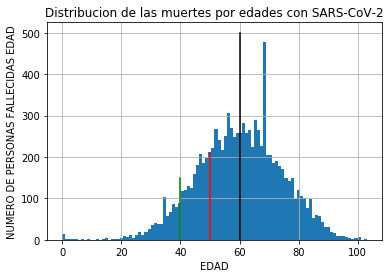

In [54]:
f2.EDAD.hist(bins=100)
plt.title("Distribucion de las muertes por edades con SARS-CoV-2")
plt.xlabel("EDAD") 
plt.ylabel("NUMERO DE PERSONAS FALLECIDAS EDAD")
plt.plot([medf2real,medf2real],[0,500],color='black')
plt.plot([Q,Q],[0,150],color='green')
plt.plot([Q1,Q1],[0,210],color='REd')

In [14]:
np.mean(f2.EDAD)

60.07076388178751

In [15]:
def MEDIA(X):
    n=len(X)
    c=sum([x for x in X])
    return(c/n)

In [20]:
medf2real=MEDIA(f2.EDAD)
medf2real

60.07076388178751

In [21]:
mediaf2=[]
for b in range(5000):
    m=np.random.choice(f2.EDAD,len(f2.EDAD))
    mediaf2.append(MEDIA(m))

In [23]:
I=(2*medf2real-np.quantile(mediaf2,1-.05/2)),(2*medf2real-np.quantile(mediaf2,.05/2))
I

(59.776533899171696, 60.35087687902649)

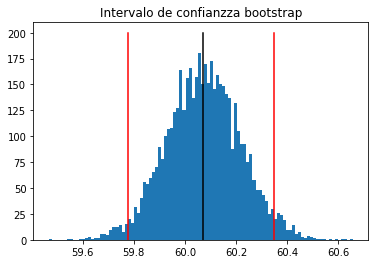

In [25]:
plt.hist(mediaf2,bins=100)
plt.title('Intervalo de confianzza bootstrap')
plt.plot([medf2real,medf2real],[0,200],color='black')
plt.plot([I[0],I[0]],[0,200],color='red')
plt.plot([I[1],I[1]],[0,200],color='red')

40.0